In [1]:
import numpy as np
import csv

import os, sys
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Dense, MaxPooling2D, Flatten, Conv2D, MaxPooling2D, Input, Activation
from keras.callbacks import TensorBoard
from keras.layers.core import Reshape
from keras import backend as K
from keras import optimizers
import keras.constraints as constraints
from keras.utils import np_utils, to_categorical
from sklearn.utils import shuffle
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint
from keras import regularizers


from keras.layers import Input, Dense
from keras.layers.advanced_activations import  LeakyReLU
from keras.models import Model
import keras.initializers as init

os.environ["CUDA_VISIBLE_DEVICES"]="0"
import tensorflow as tf
config = tf.ConfigProto( )
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
import keras.backend.tensorflow_backend as tf_bkend
tf_bkend.set_session(sess)

/home/an80020/anaconda2/envs/tensorflow/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
reader_feature = csv.reader(open('train_x.csv'))
reader_target = csv.reader(open('train_y.csv'))

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

i=0
train_feat=[]

print len(train_feat)

import matplotlib.pyplot as plt
import matplotlib.cm as cm

for row in reader_feature:
    tmp=np.asarray(row)
    tmp=tmp.astype('float32')
    tmp=tmp.reshape(64, 64)
    #S=undesired_objects (tmp)
    tmp[tmp < 240] = 0
    S=tmp
    
    train_feat.append(S.flatten()) 
    i=i+1
print len(train_feat)

0
50000


In [4]:
i=0
train_target=[]
for row in reader_target:
    train_target.append(row)
    i=i+1

In [5]:
print len(train_feat)

50000


In [6]:
nb_classes=10
batch_size=150
nb_epoch=400

In [7]:
train_feat=np.asarray(train_feat)
train_target=np.asarray(train_target)

In [8]:
#X_train = train_feat.astype('float32') / 255.0
X_train=train_feat.astype('float32')

In [9]:
data,label=shuffle(X_train,train_target,random_state=0)
train_data=[data,label]
(X,Y)=(train_data[0],train_data[1])

In [10]:
X= X.reshape(-1, 64, 64, 1)
Y=to_categorical(Y, num_classes=nb_classes)

In [11]:
reader_feature = csv.reader(open('test_x.csv'))
i=0
test_feat=[]
for row in reader_feature:
    test_feat.append(row)
    i=i+1

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
test_feat=np.asarray(test_feat)
#X_test = test_feat.astype('float32') / 255.0
X_test=test_feat.astype('float32')
X2= X_test.reshape(-1, 64, 64, 1)

In [13]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(64, 64, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(filters=64, kernel_size=(3, 3) ,strides=(2, 2), activation='relu', padding='same')(input_img)
norm1=BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(norm1)

x = Conv2D(filters=32, kernel_size=(4, 4), strides=(2, 2), activation='relu', padding='same')(x)
norm1=BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(norm1)

x = Conv2D(filters=128, kernel_size=(5, 5), strides=(2, 2), activation='relu', padding='same')(x)
norm1=BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')(norm1)

x = Conv2D(filters=128, kernel_size=(2,2), strides=(2, 2), activation='relu', padding='same')(x)
norm1=BatchNormalization()(x)
encoded = MaxPooling2D((2, 2), strides=(1, 1), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(128, (2, 2), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(128, (5, 5), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [14]:
#checkpoints 
str1="weights_autoencoder2.best.hdf5" 

filepath_encoder=str1
print(filepath_encoder)

checkpoint_encoder = ModelCheckpoint(filepath_encoder, monitor='val_loss', verbose=1, save_best_only=True, mode='min') 
callbacks_list_encoder= [checkpoint_encoder]

weights_autoencoder2.best.hdf5


In [15]:
autoencoder.fit(X, X,
                epochs=200,
                batch_size=128,
                shuffle=True,
                callbacks=callbacks_list_encoder,
                verbose=1,
                validation_data=(X2, X2))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
49792/50000 [============================>.] - ETA: 0s - loss: -445.3710
Epoch 00001: val_loss improved from inf to -613.75281, saving model to weights_autoencoder2.best.hdf5
50000/50000 [==============================] - 14s 285us/step - loss: -445.3129 - val_loss: -613.7528
Epoch 2/200
49792/50000 [============================>.] - ETA: 0s - loss: -452.7301
Epoch 00002: val_loss improved from -613.75281 to -703.25200, saving model to weights_autoencoder2.best.hdf5
50000/50000 [==============================] - 13s 263us/step - loss: -452.6505 - val_loss: -703.2520
Epoch 3/200
49792/50000 [============================>.] - ETA: 0s - loss: -455.5258
Epoch 00003: val_loss improved from -703.25200 to -1594.09254, saving model to weights_autoencoder2.best.hdf5
50000/50000 [==============================] - 13s 265us/step - loss: -455.5184 - val_loss: -1594.0925
Epoch 4/200
49792/50000 [============================>.] - ETA: 0s 

Epoch 35/200
49792/50000 [============================>.] - ETA: 0s - loss: -458.8145
Epoch 00035: val_loss did not improve
50000/50000 [==============================] - 13s 265us/step - loss: -458.7948 - val_loss: 433.5897
Epoch 36/200
49792/50000 [============================>.] - ETA: 0s - loss: -458.5067
Epoch 00036: val_loss did not improve
50000/50000 [==============================] - 13s 265us/step - loss: -458.5221 - val_loss: -153.3975
Epoch 37/200
49792/50000 [============================>.] - ETA: 0s - loss: -458.2342
Epoch 00037: val_loss did not improve
50000/50000 [==============================] - 13s 265us/step - loss: -458.2145 - val_loss: 1604.9080
Epoch 38/200
49792/50000 [============================>.] - ETA: 0s - loss: -458.0932
Epoch 00038: val_loss did not improve
50000/50000 [==============================] - 13s 265us/step - loss: -458.0546 - val_loss: -258.8136
Epoch 39/200
49792/50000 [============================>.] - ETA: 0s - loss: -457.5845
Epoch 00039

49792/50000 [============================>.] - ETA: 0s - loss: 466.9745
Epoch 00071: val_loss did not improve
50000/50000 [==============================] - 13s 263us/step - loss: 467.0012 - val_loss: 1899.3657
Epoch 72/200
49792/50000 [============================>.] - ETA: 0s - loss: 467.2140
Epoch 00072: val_loss did not improve
50000/50000 [==============================] - 13s 263us/step - loss: 467.2570 - val_loss: 1899.3688
Epoch 73/200
49792/50000 [============================>.] - ETA: 0s - loss: 467.2613
Epoch 00073: val_loss did not improve
50000/50000 [==============================] - 13s 263us/step - loss: 467.2592 - val_loss: 1899.3696
Epoch 74/200
49792/50000 [============================>.] - ETA: 0s - loss: 467.2007
Epoch 00074: val_loss did not improve
50000/50000 [==============================] - 13s 263us/step - loss: 467.2611 - val_loss: 1899.3681
Epoch 75/200
49792/50000 [============================>.] - ETA: 0s - loss: 467.2893
Epoch 00075: val_loss did not im

Epoch 108/200
49792/50000 [============================>.] - ETA: 0s - loss: 468.1874
Epoch 00108: val_loss did not improve
50000/50000 [==============================] - 13s 259us/step - loss: 468.1698 - val_loss: 1899.3969
Epoch 109/200
49792/50000 [============================>.] - ETA: 0s - loss: 468.1797
Epoch 00109: val_loss did not improve
50000/50000 [==============================] - 13s 258us/step - loss: 468.1700 - val_loss: 1899.3988
Epoch 110/200
49792/50000 [============================>.] - ETA: 0s - loss: 468.1759
Epoch 00110: val_loss did not improve
50000/50000 [==============================] - 13s 258us/step - loss: 468.1698 - val_loss: 1899.3984
Epoch 111/200
49792/50000 [============================>.] - ETA: 0s - loss: 468.1331
Epoch 00111: val_loss did not improve
50000/50000 [==============================] - 13s 259us/step - loss: 468.1697 - val_loss: 1899.3977
Epoch 112/200
49792/50000 [============================>.] - ETA: 0s - loss: 468.1998
Epoch 00112: v

Epoch 145/200
49792/50000 [============================>.] - ETA: 0s - loss: 468.1597
Epoch 00145: val_loss did not improve
50000/50000 [==============================] - 13s 258us/step - loss: 468.1701 - val_loss: 1899.3990
Epoch 146/200
49792/50000 [============================>.] - ETA: 0s - loss: 468.0932
Epoch 00146: val_loss did not improve
50000/50000 [==============================] - 14s 274us/step - loss: 468.1697 - val_loss: 1899.3973
Epoch 147/200
49792/50000 [============================>.] - ETA: 0s - loss: 468.1308
Epoch 00147: val_loss did not improve
50000/50000 [==============================] - 13s 265us/step - loss: 468.1700 - val_loss: 1899.3987
Epoch 148/200
49792/50000 [============================>.] - ETA: 0s - loss: 468.1550
Epoch 00148: val_loss did not improve
50000/50000 [==============================] - 13s 264us/step - loss: 468.1697 - val_loss: 1899.3993
Epoch 149/200
49792/50000 [============================>.] - ETA: 0s - loss: 468.2210
Epoch 00149: v

KeyboardInterrupt: 

In [22]:
autoencoder.load_weights(filepath_encoder)

flat = Flatten()(encoded)

dense1 = Dense(128,activation='relu')(flat)

drop2=Dropout(Dropout(0.5))(dense1)

dense2 = Dense(64,activation='relu')(drop2)

drop3=Dropout(Dropout(0.5))(dense2)

dense3 = Dense(32,activation='relu')(drop3)

drop4=Dropout(Dropout(0.5))(dense3)

dense4 = Dense(10,activation='softmax')(drop4)

model = Model(input_img, dense4)

model.compile(loss='mean_squared_logarithmic_error',
          optimizer=optimizers.SGD(lr=0.02, momentum=0.9,decay=1e-6,nesterov=True)
          ,metrics=['accuracy'])


In [23]:
print model.summary()

#checkpoints 
str1="weights.best2.hdf5" 

filepath=str1
print(filepath)

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max') 
callbacks_list = [checkpoint]


#fitting the model 
model.fit(X, Y, batch_size=batch_size,nb_epoch=nb_epoch, verbose=1,callbacks=callbacks_list,validation_split=0.2)

#re-generating the model 
model=model_generator()

#loading the best weights for this fold 
model.load_weights(filepath)


#evaluating the model
#print("testing on test set of fold number:"+str(fold)) 
#print(model.evaluate(X2, Y2, verbose=1))
#print(model.metrics_names)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        32800     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
__________

/home/an80020/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 40000 samples, validate on 10000 samples
Epoch 1/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0451 - acc: 0.1295
Epoch 00001: val_acc improved from -inf to 0.09900, saving model to weights.best2.hdf5
40000/40000 [==============================] - 5s 124us/step - loss: 0.0451 - acc: 0.1296 - val_loss: 0.0442 - val_acc: 0.0990
Epoch 2/400
39900/40000 [============================>.] - ETA: 0s - loss: 0.0429 - acc: 0.1658
Epoch 00002: val_acc improved from 0.09900 to 0.13820, saving model to weights.best2.hdf5
40000/40000 [==============================] - 5s 114us/step - loss: 0.0429 - acc: 0.1659 - val_loss: 0.0436 - val_acc: 0.1382
Epoch 3/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0423 - acc: 0.1862
Epoch 00003: val_acc improved from 0.13820 to 0.17480, saving model to weights.best2.hdf5
40000/40000 [==============================] - 5s 114us/step - loss: 0.0423 - acc: 0.1859 - val_loss: 0.0427 - val_acc: 0.1748
Epoch 4/400
39

Epoch 27/400
39600/40000 [============================>.] - ETA: 0s - loss: 0.0296 - acc: 0.5271
Epoch 00027: val_acc improved from 0.47400 to 0.49600, saving model to weights.best2.hdf5
40000/40000 [==============================] - 5s 114us/step - loss: 0.0295 - acc: 0.5276 - val_loss: 0.0307 - val_acc: 0.4960
Epoch 28/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0286 - acc: 0.5468
Epoch 00028: val_acc improved from 0.49600 to 0.51230, saving model to weights.best2.hdf5
40000/40000 [==============================] - 5s 118us/step - loss: 0.0287 - acc: 0.5466 - val_loss: 0.0300 - val_acc: 0.5123
Epoch 29/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0278 - acc: 0.5618
Epoch 00029: val_acc improved from 0.51230 to 0.52930, saving model to weights.best2.hdf5
40000/40000 [==============================] - 5s 116us/step - loss: 0.0278 - acc: 0.5621 - val_loss: 0.0293 - val_acc: 0.5293
Epoch 30/400
39600/40000 [============================>.] 

Epoch 54/400
39900/40000 [============================>.] - ETA: 0s - loss: 0.0109 - acc: 0.8552
Epoch 00054: val_acc improved from 0.75880 to 0.75940, saving model to weights.best2.hdf5
40000/40000 [==============================] - 5s 115us/step - loss: 0.0109 - acc: 0.8552 - val_loss: 0.0169 - val_acc: 0.7594
Epoch 55/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0105 - acc: 0.8626
Epoch 00055: val_acc did not improve
40000/40000 [==============================] - 4s 112us/step - loss: 0.0105 - acc: 0.8626 - val_loss: 0.0171 - val_acc: 0.7594
Epoch 56/400
39450/40000 [============================>.] - ETA: 0s - loss: 0.0102 - acc: 0.8684
Epoch 00056: val_acc improved from 0.75940 to 0.77120, saving model to weights.best2.hdf5
40000/40000 [==============================] - 5s 115us/step - loss: 0.0101 - acc: 0.8687 - val_loss: 0.0164 - val_acc: 0.7712
Epoch 57/400
39600/40000 [============================>.] - ETA: 0s - loss: 0.0098 - acc: 0.8730
Epoch 00057: v

39900/40000 [============================>.] - ETA: 0s - loss: 0.0043 - acc: 0.9517
Epoch 00082: val_acc improved from 0.80520 to 0.80560, saving model to weights.best2.hdf5
40000/40000 [==============================] - 5s 117us/step - loss: 0.0043 - acc: 0.9517 - val_loss: 0.0150 - val_acc: 0.8056
Epoch 83/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0042 - acc: 0.9540
Epoch 00083: val_acc improved from 0.80560 to 0.80850, saving model to weights.best2.hdf5
40000/40000 [==============================] - 5s 114us/step - loss: 0.0042 - acc: 0.9539 - val_loss: 0.0148 - val_acc: 0.8085
Epoch 84/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0041 - acc: 0.9545
Epoch 00084: val_acc did not improve
40000/40000 [==============================] - 5s 113us/step - loss: 0.0041 - acc: 0.9544 - val_loss: 0.0148 - val_acc: 0.8083
Epoch 85/400
39900/40000 [============================>.] - ETA: 0s - loss: 0.0040 - acc: 0.9559
Epoch 00085: val_acc did no

39450/40000 [============================>.] - ETA: 0s - loss: 0.0027 - acc: 0.9705
Epoch 00111: val_acc did not improve
40000/40000 [==============================] - 5s 117us/step - loss: 0.0027 - acc: 0.9705 - val_loss: 0.0150 - val_acc: 0.8123
Epoch 112/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0026 - acc: 0.9710
Epoch 00112: val_acc did not improve
40000/40000 [==============================] - 5s 120us/step - loss: 0.0026 - acc: 0.9710 - val_loss: 0.0152 - val_acc: 0.8098
Epoch 113/400
39450/40000 [============================>.] - ETA: 0s - loss: 0.0026 - acc: 0.9706
Epoch 00113: val_acc did not improve
40000/40000 [==============================] - 5s 115us/step - loss: 0.0026 - acc: 0.9706 - val_loss: 0.0149 - val_acc: 0.8120
Epoch 114/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0026 - acc: 0.9713
Epoch 00114: val_acc did not improve
40000/40000 [==============================] - 5s 117us/step - loss: 0.0026 - acc: 0.9713 - v

39450/40000 [============================>.] - ETA: 0s - loss: 0.0022 - acc: 0.9752
Epoch 00142: val_acc did not improve
40000/40000 [==============================] - 5s 122us/step - loss: 0.0022 - acc: 0.9751 - val_loss: 0.0151 - val_acc: 0.8139
Epoch 143/400
39450/40000 [============================>.] - ETA: 0s - loss: 0.0022 - acc: 0.9751
Epoch 00143: val_acc did not improve
40000/40000 [==============================] - 5s 118us/step - loss: 0.0022 - acc: 0.9751 - val_loss: 0.0149 - val_acc: 0.8140
Epoch 144/400
39450/40000 [============================>.] - ETA: 0s - loss: 0.0022 - acc: 0.9752
Epoch 00144: val_acc did not improve
40000/40000 [==============================] - 5s 118us/step - loss: 0.0022 - acc: 0.9754 - val_loss: 0.0149 - val_acc: 0.8149
Epoch 145/400
39600/40000 [============================>.] - ETA: 0s - loss: 0.0022 - acc: 0.9753
Epoch 00145: val_acc did not improve
40000/40000 [==============================] - 5s 115us/step - loss: 0.0022 - acc: 0.9753 - v

Epoch 173/400
39600/40000 [============================>.] - ETA: 0s - loss: 0.0020 - acc: 0.9773
Epoch 00173: val_acc did not improve
40000/40000 [==============================] - 5s 113us/step - loss: 0.0020 - acc: 0.9773 - val_loss: 0.0150 - val_acc: 0.8146
Epoch 174/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0020 - acc: 0.9773
Epoch 00174: val_acc did not improve
40000/40000 [==============================] - 5s 115us/step - loss: 0.0020 - acc: 0.9772 - val_loss: 0.0150 - val_acc: 0.8156
Epoch 175/400
39900/40000 [============================>.] - ETA: 0s - loss: 0.0020 - acc: 0.9773
Epoch 00175: val_acc did not improve
40000/40000 [==============================] - 5s 113us/step - loss: 0.0020 - acc: 0.9773 - val_loss: 0.0150 - val_acc: 0.8168
Epoch 176/400
39450/40000 [============================>.] - ETA: 0s - loss: 0.0019 - acc: 0.9774
Epoch 00176: val_acc did not improve
40000/40000 [==============================] - 5s 113us/step - loss: 0.0020 - a

39900/40000 [============================>.] - ETA: 0s - loss: 0.0018 - acc: 0.9788
Epoch 00204: val_acc did not improve
40000/40000 [==============================] - 5s 114us/step - loss: 0.0018 - acc: 0.9788 - val_loss: 0.0150 - val_acc: 0.8140
Epoch 205/400
39600/40000 [============================>.] - ETA: 0s - loss: 0.0018 - acc: 0.9787
Epoch 00205: val_acc did not improve
40000/40000 [==============================] - 4s 112us/step - loss: 0.0018 - acc: 0.9788 - val_loss: 0.0150 - val_acc: 0.8147
Epoch 206/400
39450/40000 [============================>.] - ETA: 0s - loss: 0.0018 - acc: 0.9788
Epoch 00206: val_acc did not improve
40000/40000 [==============================] - 4s 109us/step - loss: 0.0018 - acc: 0.9788 - val_loss: 0.0150 - val_acc: 0.8152
Epoch 207/400
39450/40000 [============================>.] - ETA: 0s - loss: 0.0018 - acc: 0.9789
Epoch 00207: val_acc did not improve
40000/40000 [==============================] - 4s 111us/step - loss: 0.0018 - acc: 0.9788 - v

39450/40000 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 0.9799
Epoch 00235: val_acc did not improve
40000/40000 [==============================] - 5s 114us/step - loss: 0.0017 - acc: 0.9799 - val_loss: 0.0149 - val_acc: 0.8163
Epoch 236/400
39600/40000 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 0.9798
Epoch 00236: val_acc did not improve
40000/40000 [==============================] - 5s 115us/step - loss: 0.0017 - acc: 0.9799 - val_loss: 0.0149 - val_acc: 0.8168
Epoch 237/400
39600/40000 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 0.9799
Epoch 00237: val_acc did not improve
40000/40000 [==============================] - 5s 115us/step - loss: 0.0017 - acc: 0.9799 - val_loss: 0.0149 - val_acc: 0.8174
Epoch 238/400
39600/40000 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 0.9799
Epoch 00238: val_acc did not improve
40000/40000 [==============================] - 5s 113us/step - loss: 0.0017 - acc: 0.9799 - v

Epoch 266/400
39600/40000 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 0.9806
Epoch 00266: val_acc did not improve
40000/40000 [==============================] - 5s 113us/step - loss: 0.0017 - acc: 0.9805 - val_loss: 0.0148 - val_acc: 0.8183
Epoch 267/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 0.9805
Epoch 00267: val_acc did not improve
40000/40000 [==============================] - 4s 109us/step - loss: 0.0017 - acc: 0.9805 - val_loss: 0.0149 - val_acc: 0.8179
Epoch 268/400
39450/40000 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 0.9806
Epoch 00268: val_acc did not improve
40000/40000 [==============================] - 5s 115us/step - loss: 0.0016 - acc: 0.9806 - val_loss: 0.0150 - val_acc: 0.8165
Epoch 269/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0017 - acc: 0.9804
Epoch 00269: val_acc did not improve
40000/40000 [==============================] - 4s 109us/step - loss: 0.0017 - a

Epoch 297/400
39900/40000 [============================>.] - ETA: 0s - loss: 0.0016 - acc: 0.9811
Epoch 00297: val_acc did not improve
40000/40000 [==============================] - 5s 113us/step - loss: 0.0016 - acc: 0.9811 - val_loss: 0.0148 - val_acc: 0.8194
Epoch 298/400
39450/40000 [============================>.] - ETA: 0s - loss: 0.0016 - acc: 0.9810
Epoch 00298: val_acc did not improve
40000/40000 [==============================] - 5s 114us/step - loss: 0.0016 - acc: 0.9811 - val_loss: 0.0149 - val_acc: 0.8176
Epoch 299/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0016 - acc: 0.9810
Epoch 00299: val_acc did not improve
40000/40000 [==============================] - 5s 118us/step - loss: 0.0016 - acc: 0.9810 - val_loss: 0.0149 - val_acc: 0.8172
Epoch 300/400
39450/40000 [============================>.] - ETA: 0s - loss: 0.0016 - acc: 0.9810
Epoch 00300: val_acc did not improve
40000/40000 [==============================] - 5s 114us/step - loss: 0.0016 - a

39600/40000 [============================>.] - ETA: 0s - loss: 0.0016 - acc: 0.9815
Epoch 00328: val_acc did not improve
40000/40000 [==============================] - 5s 116us/step - loss: 0.0016 - acc: 0.9815 - val_loss: 0.0149 - val_acc: 0.8173
Epoch 329/400
39900/40000 [============================>.] - ETA: 0s - loss: 0.0016 - acc: 0.9815
Epoch 00329: val_acc did not improve
40000/40000 [==============================] - 5s 114us/step - loss: 0.0016 - acc: 0.9815 - val_loss: 0.0148 - val_acc: 0.8178
Epoch 330/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0016 - acc: 0.9815
Epoch 00330: val_acc did not improve
40000/40000 [==============================] - 5s 114us/step - loss: 0.0016 - acc: 0.9815 - val_loss: 0.0149 - val_acc: 0.8175
Epoch 331/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0016 - acc: 0.9815
Epoch 00331: val_acc did not improve
40000/40000 [==============================] - 5s 115us/step - loss: 0.0016 - acc: 0.9815 - v

39750/40000 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9819
Epoch 00359: val_acc did not improve
40000/40000 [==============================] - 4s 108us/step - loss: 0.0015 - acc: 0.9819 - val_loss: 0.0148 - val_acc: 0.8182
Epoch 360/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9819
Epoch 00360: val_acc did not improve
40000/40000 [==============================] - 5s 123us/step - loss: 0.0015 - acc: 0.9819 - val_loss: 0.0148 - val_acc: 0.8176
Epoch 361/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9818
Epoch 00361: val_acc did not improve
40000/40000 [==============================] - 5s 130us/step - loss: 0.0015 - acc: 0.9819 - val_loss: 0.0148 - val_acc: 0.8197
Epoch 362/400
39450/40000 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9819
Epoch 00362: val_acc did not improve
40000/40000 [==============================] - 5s 125us/step - loss: 0.0015 - acc: 0.9819 - v

39450/40000 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9823
Epoch 00390: val_acc did not improve
40000/40000 [==============================] - 5s 114us/step - loss: 0.0015 - acc: 0.9822 - val_loss: 0.0148 - val_acc: 0.8182
Epoch 391/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9821
Epoch 00391: val_acc did not improve
40000/40000 [==============================] - 5s 115us/step - loss: 0.0015 - acc: 0.9822 - val_loss: 0.0148 - val_acc: 0.8185
Epoch 392/400
39750/40000 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9823
Epoch 00392: val_acc did not improve
40000/40000 [==============================] - 5s 115us/step - loss: 0.0015 - acc: 0.9822 - val_loss: 0.0148 - val_acc: 0.8184
Epoch 393/400
39450/40000 [============================>.] - ETA: 0s - loss: 0.0015 - acc: 0.9821
Epoch 00393: val_acc did not improve
40000/40000 [==============================] - 4s 112us/step - loss: 0.0015 - acc: 0.9823 - v

NameError: name 'model_generator' is not defined

In [22]:
#loading the best weights for this fold 
model.load_weights(filepath)

(10000, 10)


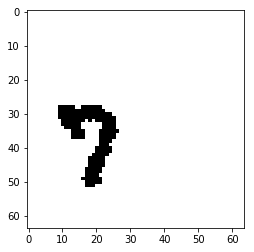

7


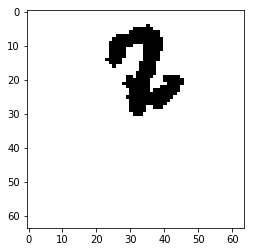

2


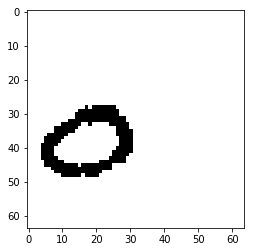

0


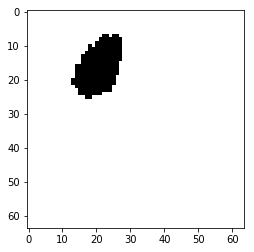

1


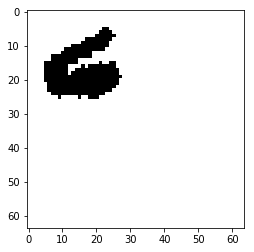

6


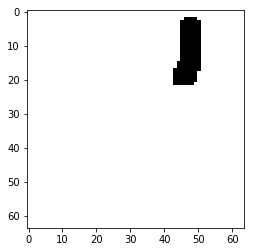

1


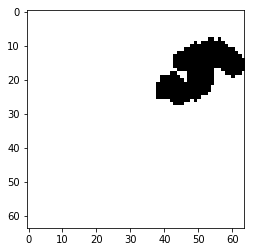

5


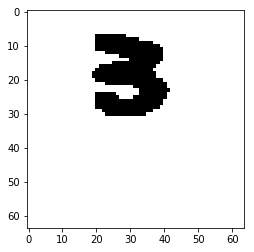

3


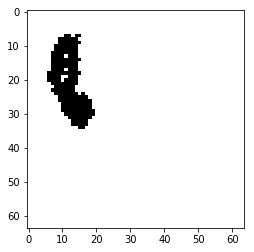

8


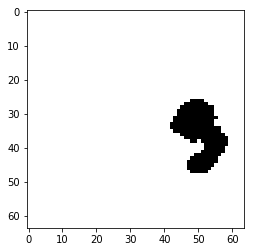

3


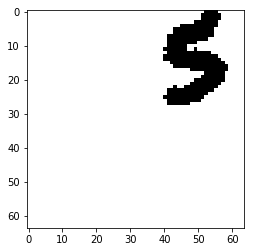

5


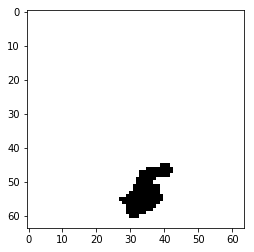

1


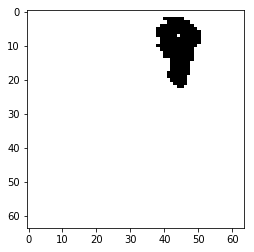

9


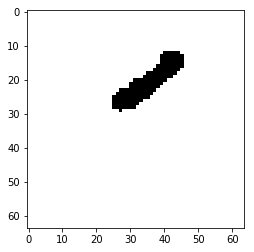

1


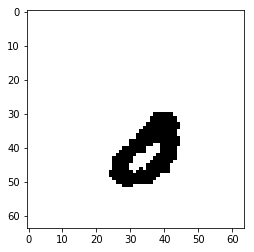

0


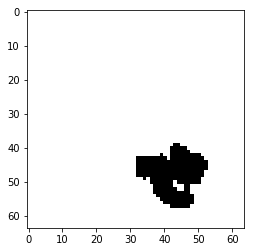

2


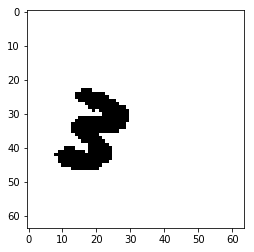

3


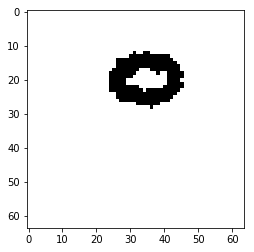

0


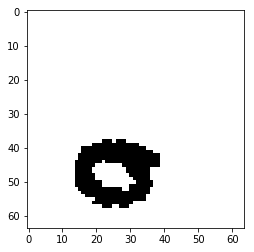

0


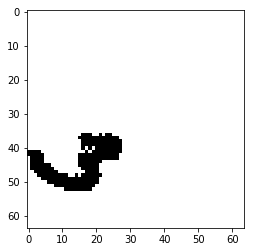

3


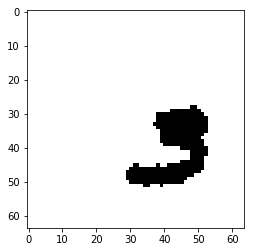

3


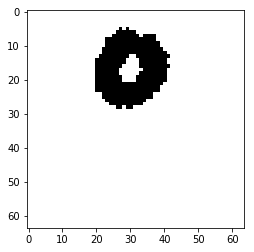

0


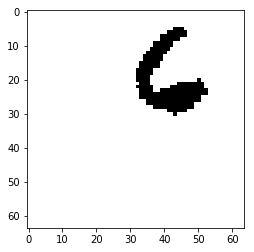

6


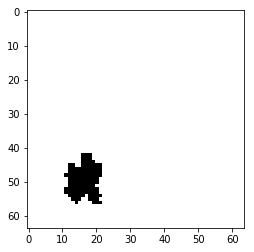

1


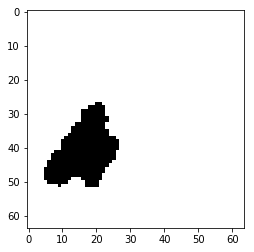

6


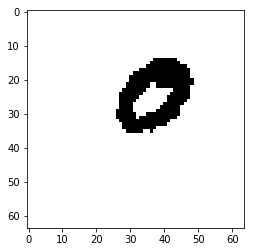

0


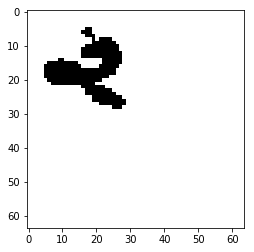

2


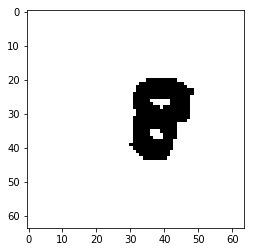

8


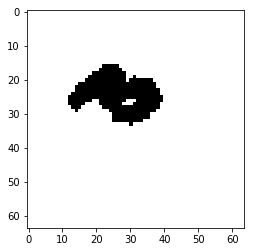

3


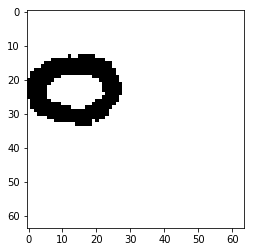

0


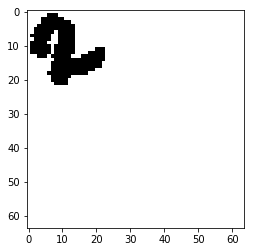

2


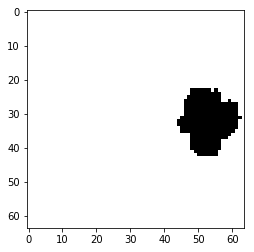

9


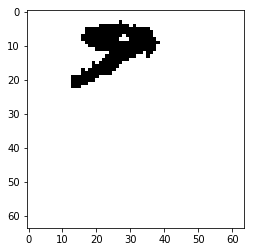

9


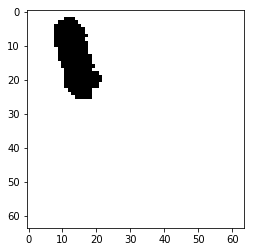

1


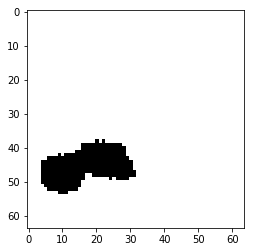

8


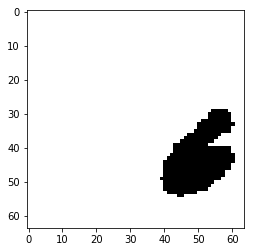

6


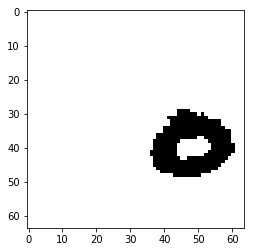

0


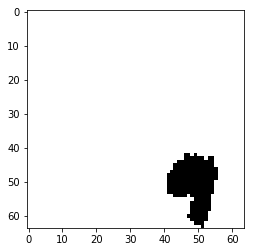

9


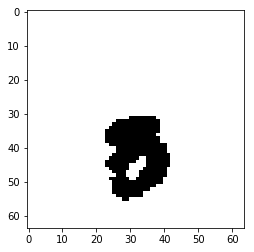

3


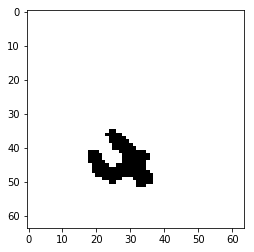

4


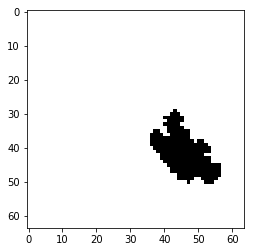

4


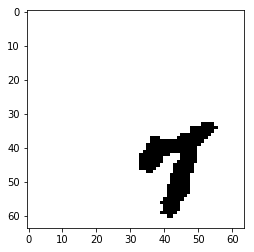

7


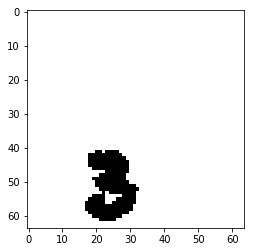

3


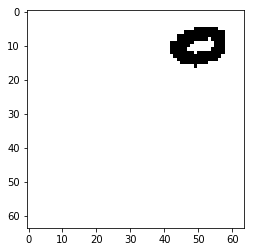

5


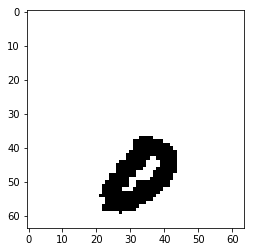

0


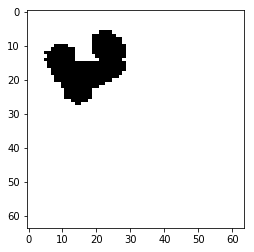

2


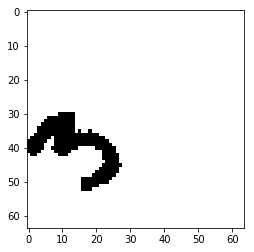

3


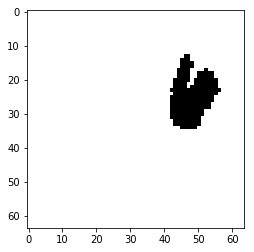

6


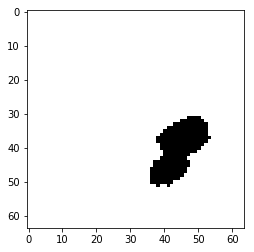

8


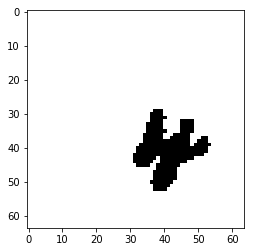

4


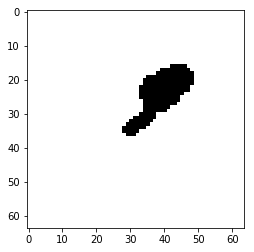

9


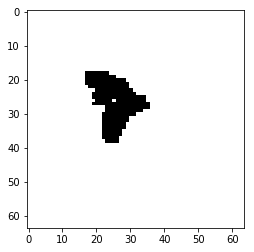

7


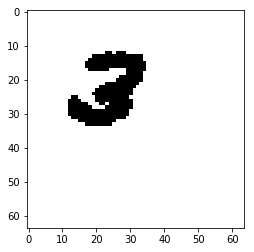

3


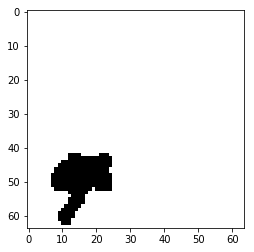

9


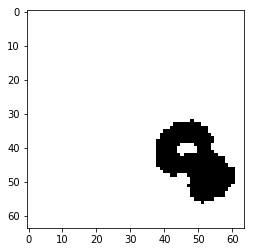

8


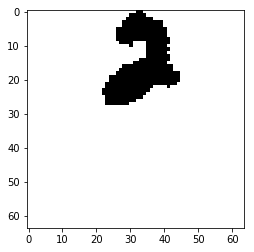

2


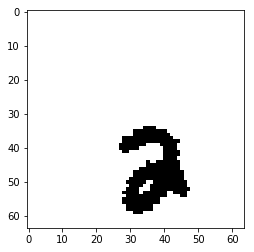

2


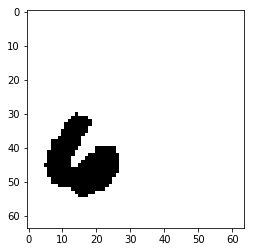

6


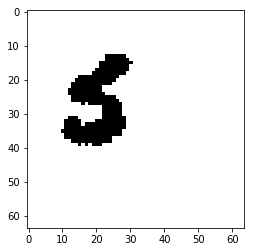

5


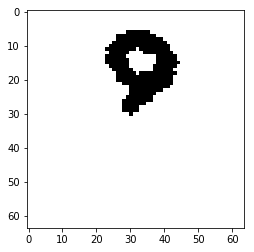

9


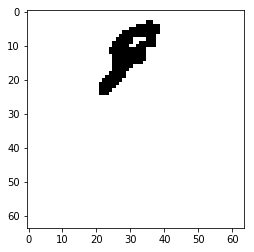

7


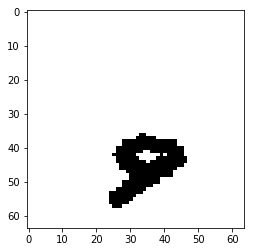

9


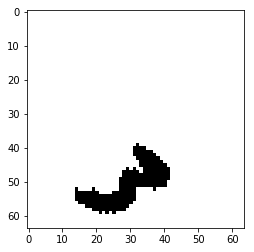

3


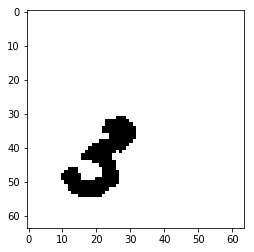

3


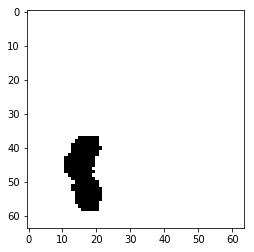

1


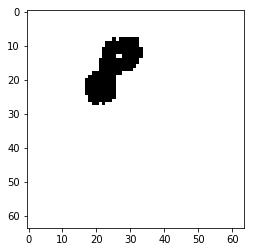

8


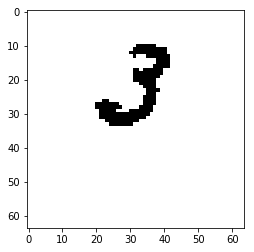

3


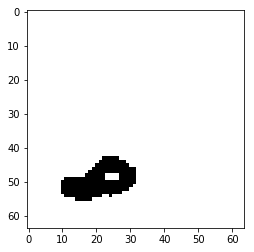

3


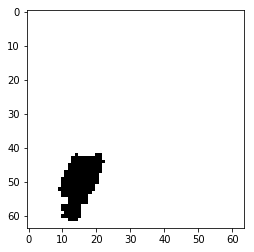

1


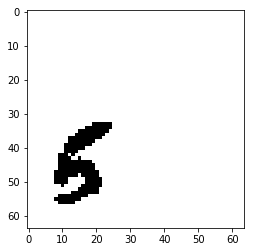

5


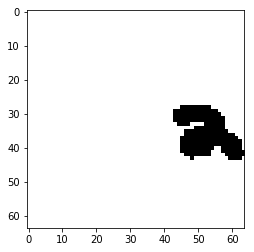

2


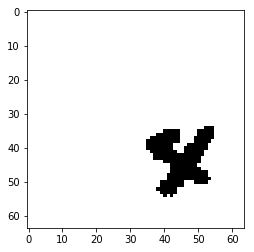

4


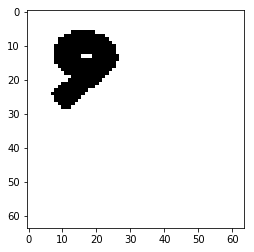

9


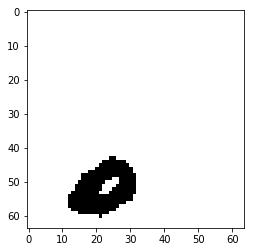

7


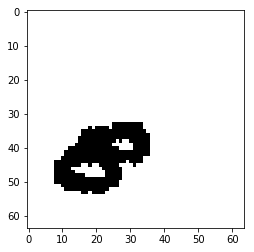

8


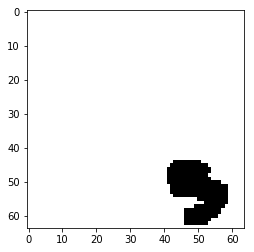

1


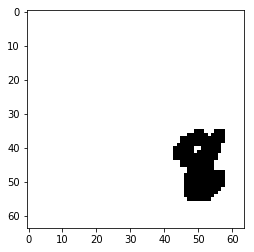

8


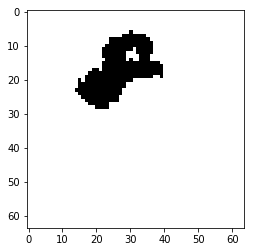

8


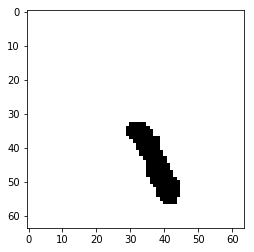

1


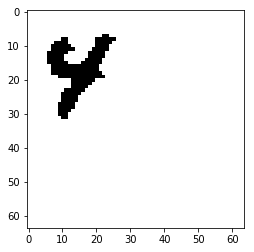

4


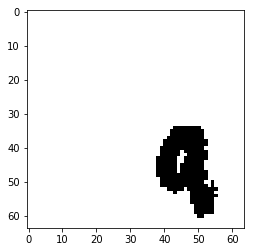

9


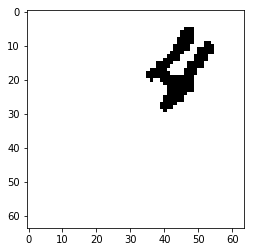

4


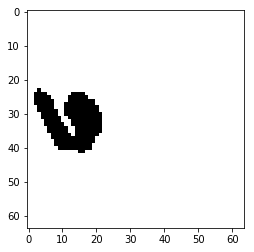

6


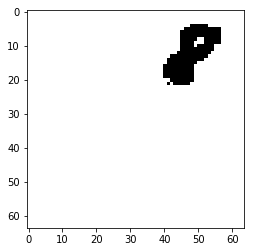

1


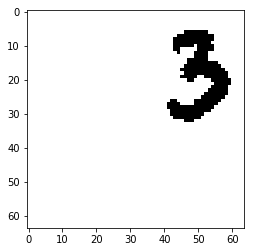

3


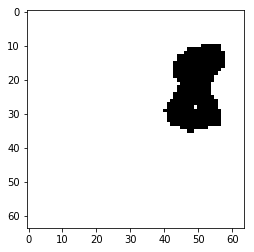

8


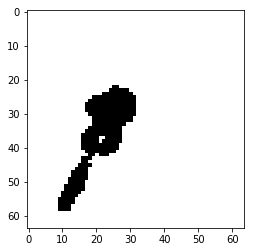

9


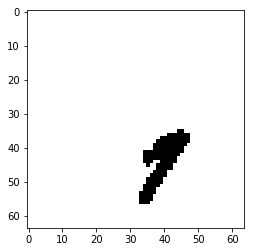

7


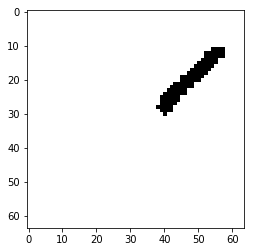

1


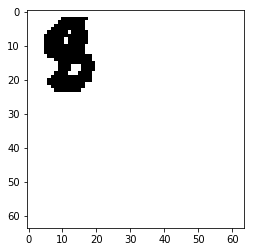

8


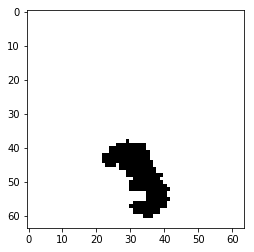

3


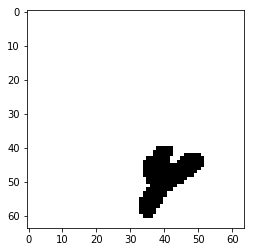

4


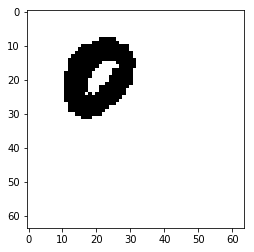

0


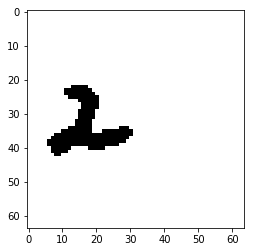

2


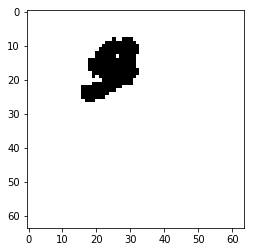

9


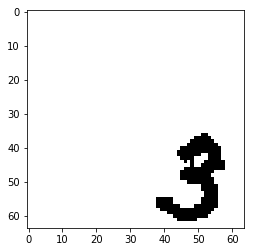

3


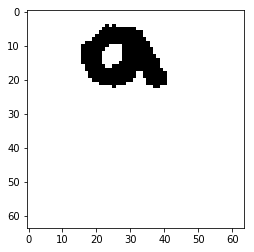

9


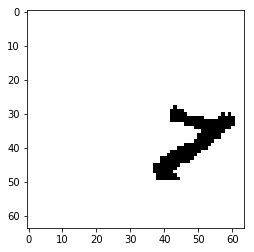

7


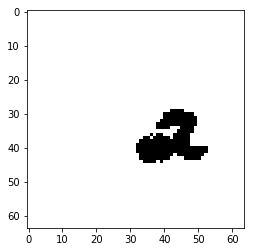

2


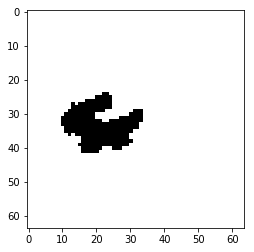

4


In [24]:
# this part shows a subset of test set and the prediction of the model. 
#Just to see how well the model performs
y_pred=model.predict(X2)
print y_pred.shape
y_pred=np.argmax(y_pred,axis=1)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
for i in range(100):
    img= X_test[i].reshape(64, 64)
    plt.imshow(img, cmap=plt.get_cmap('binary'))
    plt.show()
    print y_pred[i]   

In [30]:
import pandas as pd
i=range(0,10000)
my_df = pd.DataFrame(zip(i,y_pred), columns = ["Id", "Label"])
my_df.to_csv('submission.csv', index=False, header=True)
